In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example Notebook

Below is a tutorial notebook of how to make a complex figure using gridspecs with complex subplot structures.


### Make Fake Data and Model

In [2]:
planet_names = ["WASP-12b", "WASP-43b", "WASP-103b", "HAT-P-23b", "KELT-16b", "WD1856 + 534b", "WTS−2b"]

#We have a super simple model (not the same as what you have in the paper, just a sine wave)
def model(x):
    y = -np.sin(x + np.pi/2)/100 + 0.99
    return y

xmodel = np.linspace(-np.pi, np.pi, 100)
ymodel = model(xmodel)

#we generate some fake data to look like it matches the model well, this will all be replaced
#with your actual data you have collected. This part is just for the demo.
Nsamples = 30
planets_data = {}
for i, planet in enumerate(planet_names):
    np.random.seed(i)

    xdata = np.sort(np.random.uniform(-np.pi, np.pi, Nsamples))
    ydata = -np.sin(xdata + np.pi/2)/100 + 0.99 + np.random.normal(size=Nsamples)/500
    ydata_err = np.abs(np.random.normal(loc=5.0, size=Nsamples)/2000)
    
    planets_data[planet] = {'xdata':xdata, 'ydata':ydata, 'ydata_err':ydata_err}


In [3]:
# example of how I store the data for each planet. Can and probably will be different to what 
# you already have in your code.
planets_data['WASP-12b']

{'xdata': array([-3.01455672, -2.69525994, -2.59414312, -2.39845252, -2.24087738,
        -0.73235854, -0.53619484, -0.47969104, -0.39215112, -0.24203231,
         0.13727705,  0.18155214,  0.28200936,  0.30670429,  0.42753659,
         0.64568133,  0.87914971,  0.91667975,  1.35207467,  1.74771041,
         1.7626168 ,  1.83296247,  1.8796687 ,  2.08991213,  2.32485489,
         2.46158236,  2.67410254,  2.79393721,  2.91327904,  3.00724774]),
 'ydata': array([1.00164829, 0.99753603, 1.00307806, 0.99445474, 0.99630201,
        0.98218964, 0.98446897, 0.98406734, 0.981069  , 0.9810478 ,
        0.97831851, 0.97620276, 0.97969919, 0.98077936, 0.98336068,
        0.98441786, 0.98284728, 0.98331081, 0.98573307, 0.98891989,
        0.98849392, 0.99649328, 0.99202054, 0.99408498, 0.99434044,
        0.99933064, 0.99569923, 0.99897626, 0.99794956, 1.0006837 ]),
 'ydata_err': array([0.0022446 , 0.00190968, 0.00248591, 0.00271417, 0.00253326,
        0.00265124, 0.00218284, 0.00231863, 0.00216

### Plot Normalized Light Curve Figure Type

based off of what I think your figures in the paper are trying to do, it sounds like the left panel was the actual data and model while the right panel was supposed to be outliers? The figure caption was a little confusing. Anyway, I think this is typically the best way to plot what you were trying to plot if that's the case. I also include a format more in line with what you already had on the paper if my interpretation is incorrect/if you don't like this format.

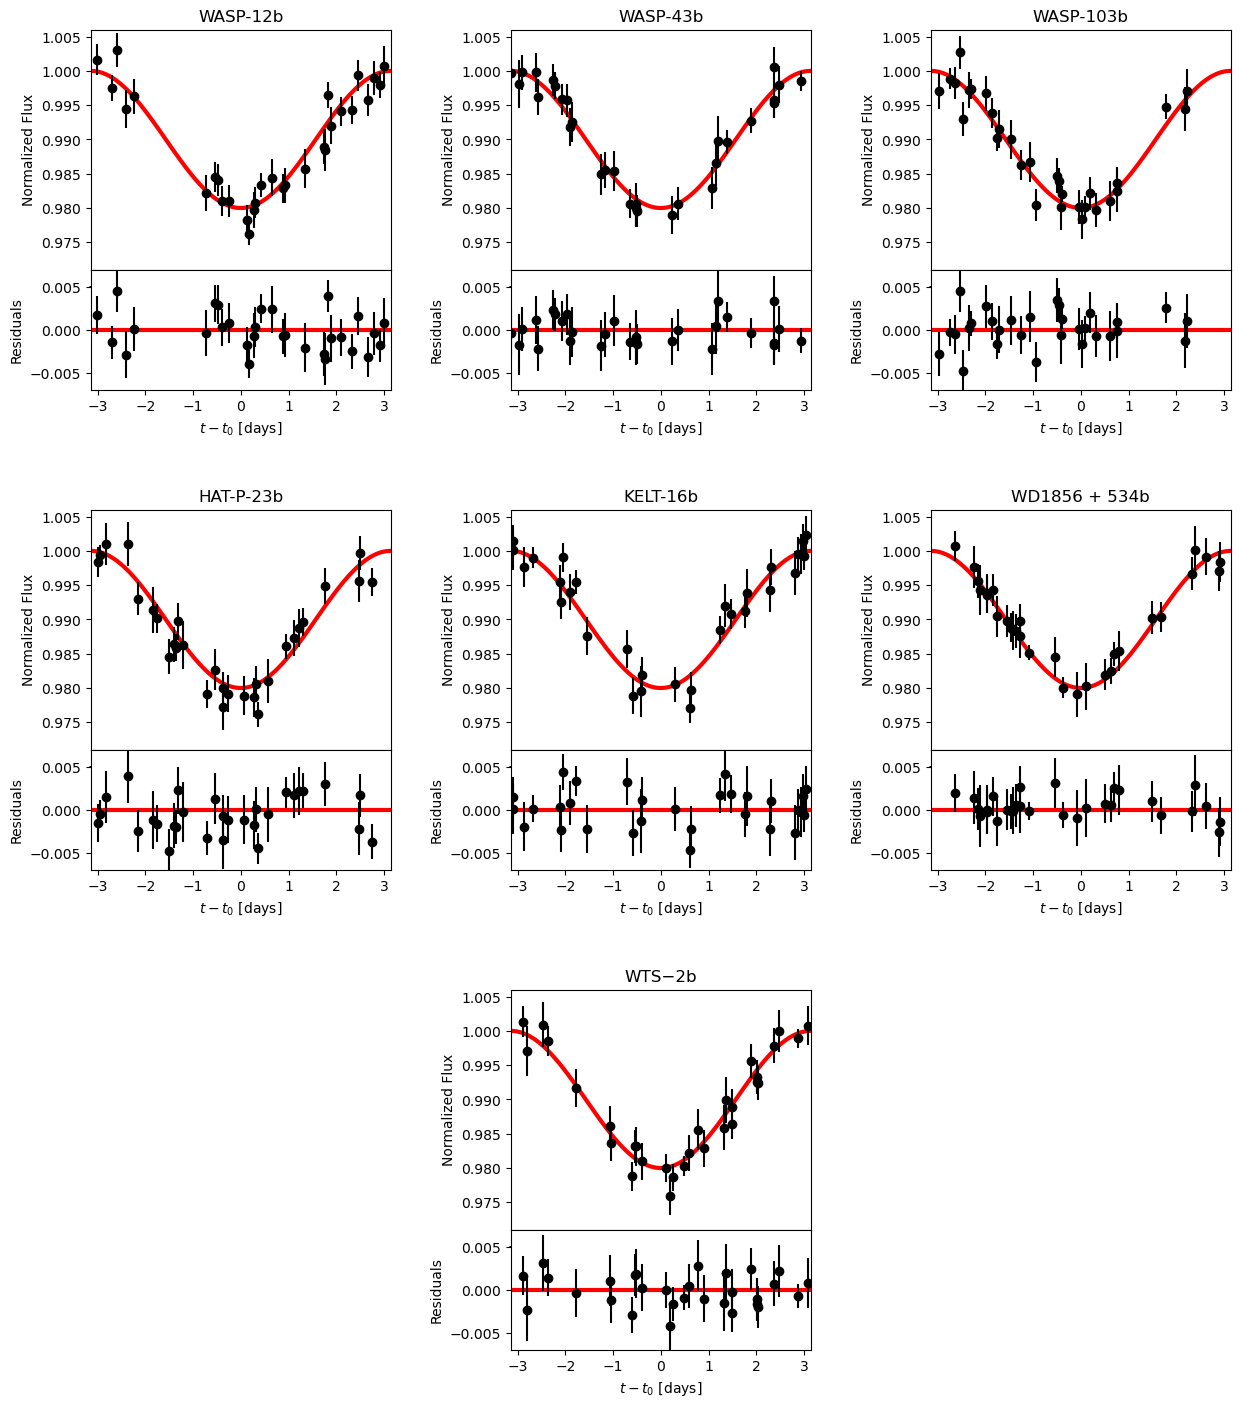

In [4]:
fig = plt.figure(constrained_layout=False, figsize=(6,4))

#create subplots
gridspec_subfigure_1 = fig.add_gridspec(nrows=3, ncols=1, wspace=0, hspace=0,  
                                        left=0, right=0.5, top=1.0, bottom=0.1) #dictates the position in the figure

subfig1_ax_top = fig.add_subplot(gridspec_subfigure_1[0:2])
subfig1_ax_bottom = fig.add_subplot(gridspec_subfigure_1[2])

gridspec_subfigure_2 = fig.add_gridspec(nrows=3, ncols=1, hspace=0, wspace=0, 
                                        left=0.7, right=1.2, top=1.0, bottom=0.1) #dictates the position in the figure

subfig2_ax_top = fig.add_subplot(gridspec_subfigure_2[0:2])
subfig2_ax_bottom = fig.add_subplot(gridspec_subfigure_2[2])

gridspec_subfigure_3 = fig.add_gridspec(nrows=3, ncols=1, hspace=0, wspace=0, 
                                        left=1.4, right=1.9, top=1.0, bottom=0.1) #dictates the position in the figure

subfig3_ax_top = fig.add_subplot(gridspec_subfigure_3[0:2])
subfig3_ax_bottom = fig.add_subplot(gridspec_subfigure_3[2])

gridspec_subfigure_4 = fig.add_gridspec(nrows=3, ncols=1, wspace=0, hspace=0,  
                                        left=0, right=0.5, top=-0.2, bottom=-1.1) #dictates the position in the figure

subfig4_ax_top = fig.add_subplot(gridspec_subfigure_4[0:2])
subfig4_ax_bottom = fig.add_subplot(gridspec_subfigure_4[2])

gridspec_subfigure_5 = fig.add_gridspec(nrows=3, ncols=1, hspace=0, wspace=0, 
                                        left=0.7, right=1.2, top=-0.2, bottom=-1.1) #dictates the position in the figure

subfig5_ax_top = fig.add_subplot(gridspec_subfigure_5[0:2])
subfig5_ax_bottom = fig.add_subplot(gridspec_subfigure_5[2])

gridspec_subfigure_6 = fig.add_gridspec(nrows=3, ncols=1, hspace=0, wspace=0, 
                                        left=1.4, right=1.9, top=-0.2, bottom=-1.1) #dictates the position in the figure

subfig6_ax_top = fig.add_subplot(gridspec_subfigure_6[0:2])
subfig6_ax_bottom = fig.add_subplot(gridspec_subfigure_6[2])

gridspec_subfigure_7 = fig.add_gridspec(nrows=3, ncols=1, hspace=0, wspace=0, 
                                        left=0.7, right=1.2, top=-1.4, bottom=-2.3) #dictates the position in the figure

subfig7_ax_top = fig.add_subplot(gridspec_subfigure_7[0:2])
subfig7_ax_bottom = fig.add_subplot(gridspec_subfigure_7[2])


#create our list of all subplots
axes = [subfig1_ax_top, subfig1_ax_bottom, 
        subfig2_ax_top, subfig2_ax_bottom, 
        subfig3_ax_top, subfig3_ax_bottom,
        subfig4_ax_top, subfig4_ax_bottom,
        subfig5_ax_top, subfig5_ax_bottom,
        subfig6_ax_top, subfig6_ax_bottom,
        subfig7_ax_top, subfig7_ax_bottom
       ]
#create a subset list of subplots which is only for top panels across all subfigures
top_axes = [subfig1_ax_top,
             subfig2_ax_top,
             subfig3_ax_top,
             subfig4_ax_top,
             subfig5_ax_top,
             subfig6_ax_top,
             subfig7_ax_top]
#create a subset list of subplots which is only for bottom panels across all subfigures
bottom_axes = [subfig1_ax_bottom,
              subfig2_ax_bottom,
              subfig3_ax_bottom,
              subfig4_ax_bottom,
              subfig5_ax_bottom,
              subfig6_ax_bottom,
              subfig7_ax_bottom]


#for sake of keeping this notebook brief, I just loop over all the subplots in for loops
#and make the plots that way. You could just write out each part for each subplot individually
#if that's easier.


#all axes
for i, ax in enumerate(axes):
    ax.set_xlim(-np.pi,np.pi)    
    
#only top axes
for i, ax_top in enumerate(top_axes):
    planet_name = planet_names[i]
    planet_data = planets_data[planet_name]
    
    ax_top.set_title(planet_name)
    ax_top.set_ylabel("Normalized Flux")
    ax_top.set_ylim(0.971,1.006)
    
    
    ax_top.plot(xmodel, ymodel, color="red", lw=3)
    ax_top.errorbar(planet_data['xdata'], planet_data['ydata'], 
                     yerr=planet_data['ydata_err'], fmt="o", color="black")
    
#only bottom axes   
for i, ax_bottom in enumerate(bottom_axes):
    planet_name = planet_names[i]
    planet_data = planets_data[planet_name]
    
    ax_bottom.set_ylabel("Residuals")
    ax_bottom.set_xlabel("$t - t_0$ [days]")
    ax_bottom.set_ylim(-0.007, 0.007)
    
    ax_bottom.plot(xmodel, np.zeros(100), color="red", lw=3)
    ax_bottom.errorbar(planet_data['xdata'], planet_data['ydata'] - model(planet_data['xdata']), yerr=planet_data['ydata_err'], fmt="o", color="black")
    
plt.savefig("plot1.pdf", bbox_inches="tight") #if saving as png, MAKE SURE TO USE dpi=300. Blurry plots are awful.
plt.show()

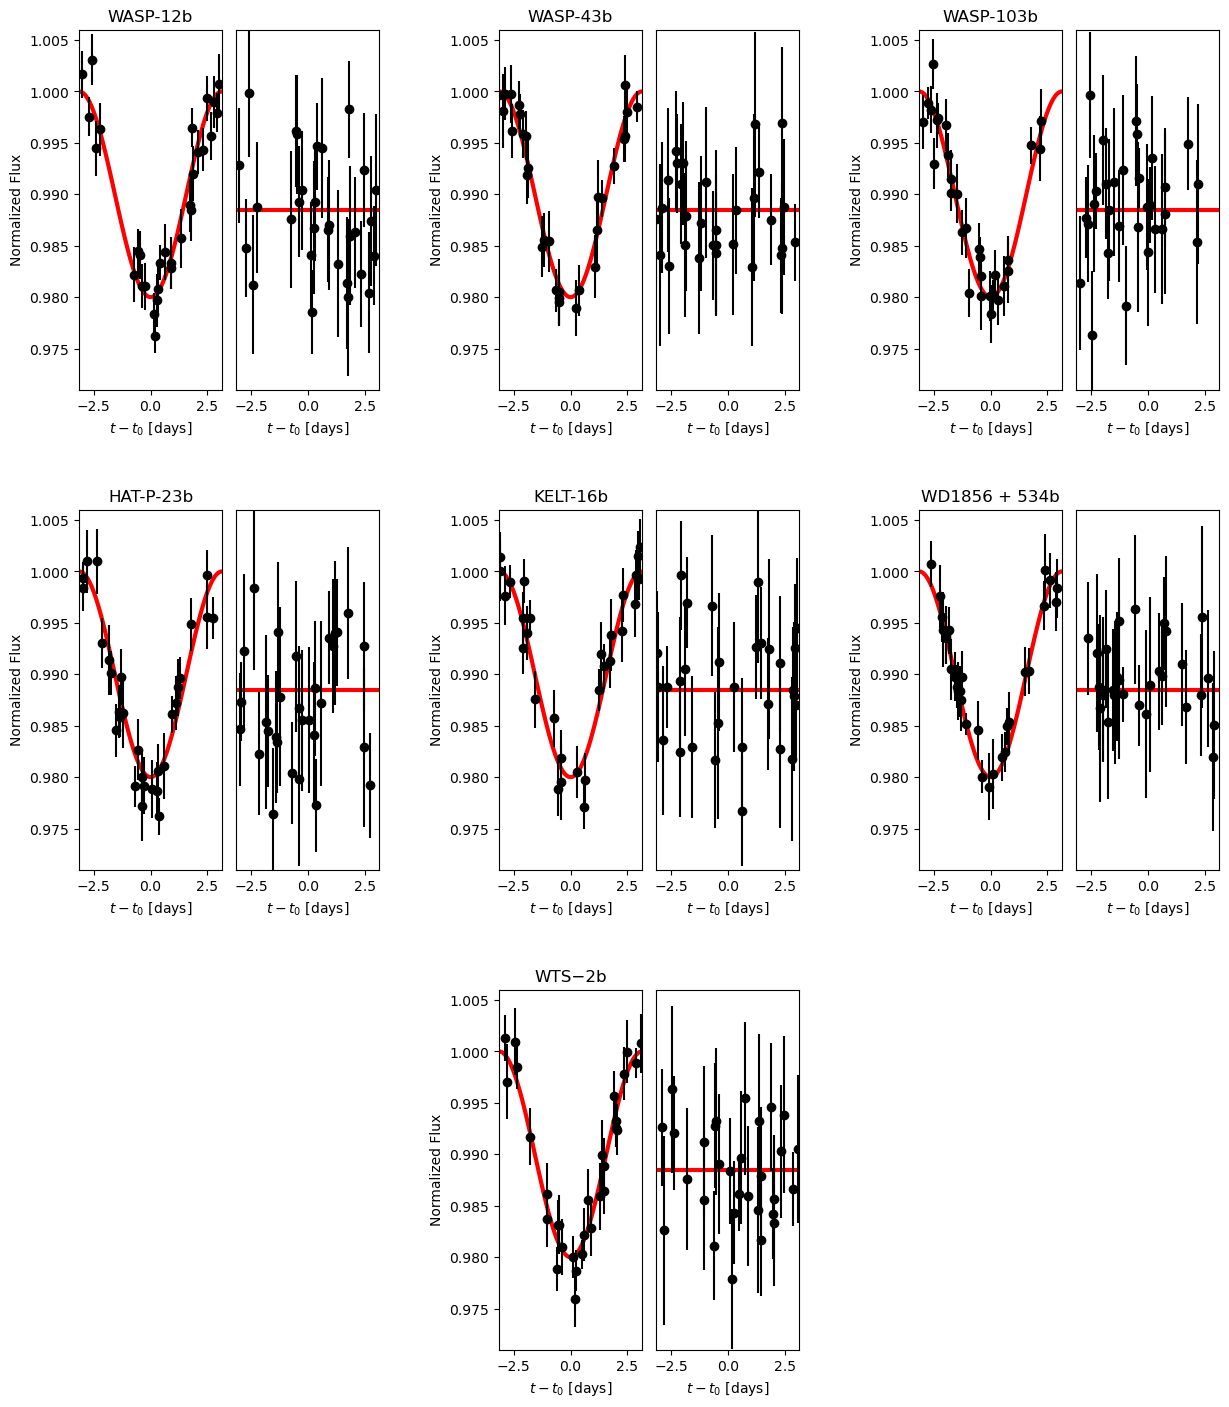

In [5]:
fig = plt.figure(constrained_layout=False, figsize=(6,4))

#create subplots
gridspec_subfigure_1 = fig.add_gridspec(nrows=1, ncols=2, hspace=0, wspace=0.1,  
                                        left=0, right=0.5, top=1.0, bottom=0.1) #dictates the position in the figure

subfig1_ax_left = fig.add_subplot(gridspec_subfigure_1[0])
subfig1_ax_right = fig.add_subplot(gridspec_subfigure_1[1])

gridspec_subfigure_2 = fig.add_gridspec(nrows=1, ncols=2, hspace=0, wspace=0.1, 
                                        left=0.7, right=1.2, top=1.0, bottom=0.1) #dictates the position in the figure

subfig2_ax_left = fig.add_subplot(gridspec_subfigure_2[0])
subfig2_ax_right = fig.add_subplot(gridspec_subfigure_2[1])

gridspec_subfigure_3 = fig.add_gridspec(nrows=1, ncols=2, hspace=0, wspace=0.1, 
                                        left=1.4, right=1.9, top=1.0, bottom=0.1) #dictates the position in the figure

subfig3_ax_left = fig.add_subplot(gridspec_subfigure_3[0])
subfig3_ax_right = fig.add_subplot(gridspec_subfigure_3[1])

gridspec_subfigure_4 = fig.add_gridspec(nrows=1, ncols=2, hspace=0, wspace=0.1,  
                                        left=0, right=0.5, top=-0.2, bottom=-1.1) #dictates the position in the figure

subfig4_ax_left = fig.add_subplot(gridspec_subfigure_4[0])
subfig4_ax_right = fig.add_subplot(gridspec_subfigure_4[1])

gridspec_subfigure_5 = fig.add_gridspec(nrows=1, ncols=2, hspace=0, wspace=0.1, 
                                        left=0.7, right=1.2, top=-0.2, bottom=-1.1) #dictates the position in the figure

subfig5_ax_left = fig.add_subplot(gridspec_subfigure_5[0])
subfig5_ax_right = fig.add_subplot(gridspec_subfigure_5[1])

gridspec_subfigure_6 = fig.add_gridspec(nrows=1, ncols=2, hspace=0, wspace=0.1, 
                                        left=1.4, right=1.9, top=-0.2, bottom=-1.1) #dictates the position in the figure

subfig6_ax_left = fig.add_subplot(gridspec_subfigure_6[0])
subfig6_ax_right = fig.add_subplot(gridspec_subfigure_6[1])

gridspec_subfigure_7 = fig.add_gridspec(nrows=1, ncols=2, hspace=0, wspace=0.1, 
                                        left=0.7, right=1.2, top=-1.4, bottom=-2.3) #dictates the position in the figure

subfig7_ax_left = fig.add_subplot(gridspec_subfigure_7[0])
subfig7_ax_right = fig.add_subplot(gridspec_subfigure_7[1])


#create our list of all subplots
axes = [subfig1_ax_left, subfig1_ax_right, 
        subfig2_ax_left, subfig2_ax_right, 
        subfig3_ax_left, subfig3_ax_right,
        subfig4_ax_left, subfig4_ax_right,
        subfig5_ax_left, subfig5_ax_right,
        subfig6_ax_left, subfig6_ax_right,
        subfig7_ax_left, subfig7_ax_right
       ]
#create a subset list of subplots which is only for left panels across all subfigures
left_axes = [subfig1_ax_left,
             subfig2_ax_left,
             subfig3_ax_left,
             subfig4_ax_left,
             subfig5_ax_left,
             subfig6_ax_left,
             subfig7_ax_left]
#create a subset list of subplots which is only for right panels across all subfigures
right_axes = [subfig1_ax_right,
              subfig2_ax_right,
              subfig3_ax_right,
              subfig4_ax_right,
              subfig5_ax_right,
              subfig6_ax_right,
              subfig7_ax_right]


#for sake of keeping this notebook brief, I just loop over all the subplots in for loops
#and make the plots that way. You could just write out each part for each subplot individually
#if that's easier.


#all axes
for i, ax in enumerate(axes):
    ax.set_xlim(-np.pi,np.pi)  
    ax.set_xlabel("$t - t_0$ [days]")
    
#only left axes
for i, ax_left in enumerate(left_axes):
    planet_name = planet_names[i]
    planet_data = planets_data[planet_name]
    
    ax_left.set_title(planet_name)
    ax_left.set_ylabel("Normalized Flux")
    ax_left.set_ylim(0.971,1.006)
    
    
    ax_left.plot(xmodel, ymodel, color="red", lw=3)
    ax_left.errorbar(planet_data['xdata'], planet_data['ydata'], 
                     yerr=planet_data['ydata_err'], fmt="o", color="black")
    
#only right axes   
for i, ax_right in enumerate(right_axes):
    planet_name = planet_names[i]
    planet_data = planets_data[planet_name]
    
    ax_right.set_ylim(-0.007, 0.007)
    ax_right.set_yticks([]) #hide yticks so that they don't overlap with the left subplots
    
    
    ax_right.plot(xmodel, np.zeros(100), color="red", lw=3)
    ax_right.errorbar(planet_data['xdata'], planet_data['ydata'] - model(planet_data['xdata']), 
                      yerr=planet_data['ydata_err'], fmt="o", color="black")
    
    
plt.savefig("plot2.pdf", bbox_inches="tight") #if saving as png, MAKE SURE TO USE dpi=300. Blurry plots are awful.    
plt.show()

### Plot OC-diagram Figure Type

Below we plot an example of the OC-Diagram Curves. I don't actually make fake OC data here simply because that's not the point of the tutorial. I just changed the gridspec functions a little bit so that it's more in the format needed for your OC diagram needs. Feel free to play around with this example and try and plug in your own OC data and change the xlims,ylims, labels, etc... to suit your needs to what you have in the paper. 

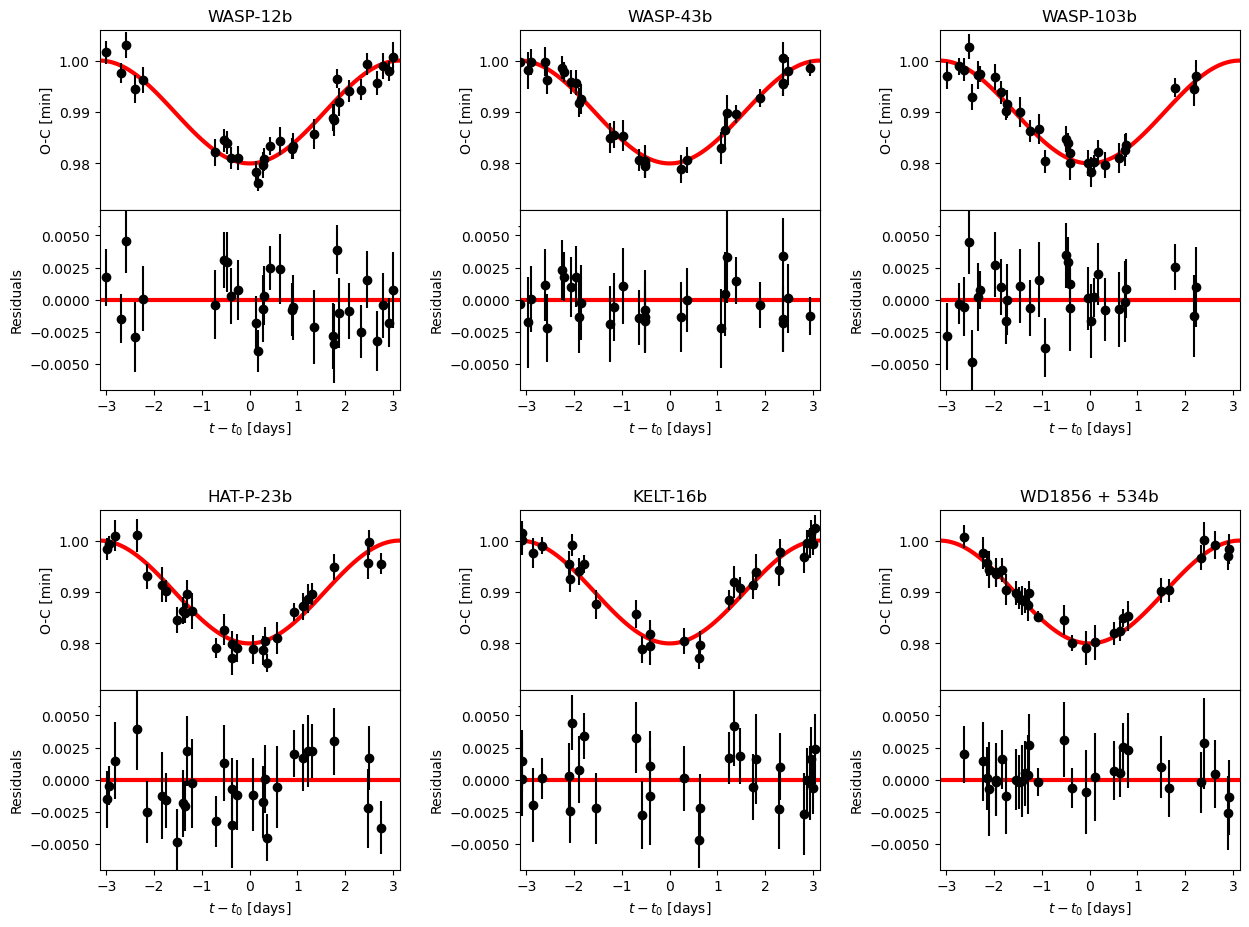

In [6]:
fig = plt.figure(constrained_layout=False, figsize=(6,4))

#create subplots
gridspec_subfigure_1 = fig.add_gridspec(nrows=2, ncols=1, wspace=0, hspace=0,  
                                        left=0, right=0.5, top=1.0, bottom=0.1) #dictates the position in the figure

subfig1_ax_top = fig.add_subplot(gridspec_subfigure_1[0])
subfig1_ax_bottom = fig.add_subplot(gridspec_subfigure_1[1])

gridspec_subfigure_2 = fig.add_gridspec(nrows=2, ncols=1, hspace=0, wspace=0, 
                                        left=0.7, right=1.2, top=1.0, bottom=0.1) #dictates the position in the figure

subfig2_ax_top = fig.add_subplot(gridspec_subfigure_2[0])
subfig2_ax_bottom = fig.add_subplot(gridspec_subfigure_2[1])

gridspec_subfigure_3 = fig.add_gridspec(nrows=2, ncols=1, hspace=0, wspace=0, 
                                        left=1.4, right=1.9, top=1.0, bottom=0.1) #dictates the position in the figure

subfig3_ax_top = fig.add_subplot(gridspec_subfigure_3[0])
subfig3_ax_bottom = fig.add_subplot(gridspec_subfigure_3[1])

gridspec_subfigure_4 = fig.add_gridspec(nrows=2, ncols=1, wspace=0, hspace=0,  
                                        left=0, right=0.5, top=-0.2, bottom=-1.1) #dictates the position in the figure

subfig4_ax_top = fig.add_subplot(gridspec_subfigure_4[0])
subfig4_ax_bottom = fig.add_subplot(gridspec_subfigure_4[1])

gridspec_subfigure_5 = fig.add_gridspec(nrows=2, ncols=1, hspace=0, wspace=0, 
                                        left=0.7, right=1.2, top=-0.2, bottom=-1.1) #dictates the position in the figure

subfig5_ax_top = fig.add_subplot(gridspec_subfigure_5[0])
subfig5_ax_bottom = fig.add_subplot(gridspec_subfigure_5[1])

gridspec_subfigure_6 = fig.add_gridspec(nrows=2, ncols=1, hspace=0, wspace=0, 
                                        left=1.4, right=1.9, top=-0.2, bottom=-1.1) #dictates the position in the figure

subfig6_ax_top = fig.add_subplot(gridspec_subfigure_6[0])
subfig6_ax_bottom = fig.add_subplot(gridspec_subfigure_6[1])

# gridspec_subfigure_7 = fig.add_gridspec(nrows=2, ncols=1, hspace=0, wspace=0, 
#                                         left=0.7, right=1.2, top=-1.4, bottom=-2.3) #dictates the position in the figure

# subfig7_ax_top = fig.add_subplot(gridspec_subfigure_7[0])
# subfig7_ax_bottom = fig.add_subplot(gridspec_subfigure_7[1])


#create our list of all subplots
axes = [subfig1_ax_top, subfig1_ax_bottom, 
        subfig2_ax_top, subfig2_ax_bottom, 
        subfig3_ax_top, subfig3_ax_bottom,
        subfig4_ax_top, subfig4_ax_bottom,
        subfig5_ax_top, subfig5_ax_bottom,
        subfig6_ax_top, subfig6_ax_bottom,
        # subfig7_ax_top, subfig7_ax_bottom
       ]
#create a subset list of subplots which is only for top panels across all subfigures
top_axes = [subfig1_ax_top,
             subfig2_ax_top,
             subfig3_ax_top,
             subfig4_ax_top,
             subfig5_ax_top,
             subfig6_ax_top,
             # subfig7_ax_top
           ]
#create a subset list of subplots which is only for bottom panels across all subfigures
bottom_axes = [subfig1_ax_bottom,
              subfig2_ax_bottom,
              subfig3_ax_bottom,
              subfig4_ax_bottom,
              subfig5_ax_bottom,
              subfig6_ax_bottom,
              # subfig7_ax_bottom
              ]


#for sake of keeping this notebook brief, I just loop over all the subplots in for loops
#and make the plots that way. You could just write out each part for each subplot individually
#if that's easier.


#all axes
for i, ax in enumerate(axes):
    ax.set_xlim(-np.pi,np.pi)    
    
#only top axes
for i, ax_top in enumerate(top_axes):
    planet_name = planet_names[i]
    planet_data = planets_data[planet_name]
    
    ax_top.set_title(planet_name)
    ax_top.set_ylabel("O-C [min]")
    ax_top.set_ylim(0.971,1.006)
    
    
    ax_top.plot(xmodel, ymodel, color="red", lw=3)
    ax_top.errorbar(planet_data['xdata'], planet_data['ydata'], 
                     yerr=planet_data['ydata_err'], fmt="o", color="black")
    
#only bottom axes   
for i, ax_bottom in enumerate(bottom_axes):
    planet_name = planet_names[i]
    planet_data = planets_data[planet_name]
    
    ax_bottom.set_ylabel("Residuals")
    ax_bottom.set_xlabel("$t - t_0$ [days]")
    ax_bottom.set_ylim(-0.007, 0.007)
    
    ax_bottom.plot(xmodel, np.zeros(100), color="red", lw=3)
    ax_bottom.errorbar(planet_data['xdata'], planet_data['ydata'] - model(planet_data['xdata']), yerr=planet_data['ydata_err'], fmt="o", color="black")

plt.savefig("plot3.pdf", bbox_inches="tight") #if saving as png, MAKE SURE TO USE dpi=300. Blurry plots are awful.
plt.show()

# Reference Matplotlib Example

For more details of how all this stuff works, check out this matplotlib documentation page: https://matplotlib.org/3.1.0/tutorials/intermediate/gridspec.html

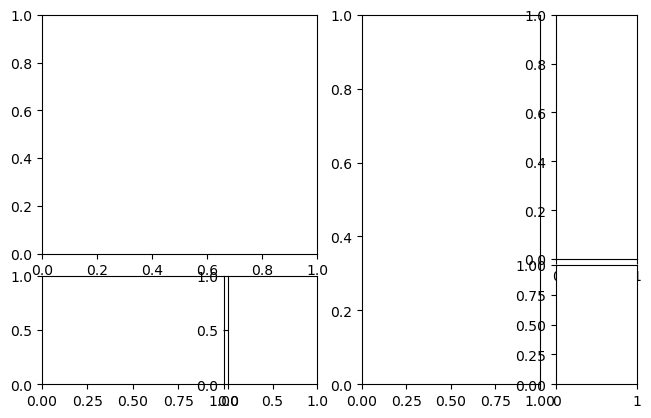

In [7]:
#reference code snippet used to make this 
fig9 = plt.figure(constrained_layout=False)
gs1 = fig9.add_gridspec(nrows=3, ncols=3, left=0.05, right=0.48,
                        wspace=0.05)
f9_ax1 = fig9.add_subplot(gs1[:-1, :])
f9_ax2 = fig9.add_subplot(gs1[-1, :-1])
f9_ax3 = fig9.add_subplot(gs1[-1, -1])

gs2 = fig9.add_gridspec(nrows=3, ncols=3, left=0.55, right=0.98,
                        hspace=0.05)
f9_ax4 = fig9.add_subplot(gs2[:, :-1])
f9_ax5 = fig9.add_subplot(gs2[:-1, -1])
f9_ax6 = fig9.add_subplot(gs2[-1, -1])